# baseline models

In [6]:
import numpy as np

baseline_results = np.load('../results/baseline_results.npz')
baseline_rf_r2 = baseline_results['rf_r2']
baseline_rf_rmse = baseline_results['rf_rmse']
baseline_xgb_r2 = baseline_results['xgb_r2']
baseline_xgb_rmse = baseline_results['xgb_rmse']

# node2vec models

In [7]:
import numpy as np

n2v_results = np.load('../results/n2v_results.npz')
n2v_rf_r2 = n2v_results['rf_r2']
n2v_rf_rmse = n2v_results['rf_rmse']
n2v_xgb_r2 = n2v_results['xgb_r2']
n2v_xgb_rmse = n2v_results['xgb_rmse']

# gnn model

In [8]:
import torch

gnn_results = torch.load('../results/gnn/results.pt', weights_only=False)
gnn_r2 = gnn_results['gnn_r2']
gnn_rmse = gnn_results['gnn_rmse']

# gnn feat model

In [9]:
import torch

gnn_feat_results = torch.load('../results/gnn_feat/results.pt', weights_only=False)
gnn_feat_r2 = gnn_feat_results['gnn_r2']
gnn_feat_rmse = gnn_feat_results['gnn_rmse']

# compare model results

10-Fold CV Summary Table (Baseline Models)

       Model            R2          RMSE
 Baseline RF 0.729 ± 0.002 0.174 ± 0.001
Baseline XGB 0.703 ± 0.003 0.182 ± 0.001
         GNN 0.306 ± 0.005 0.278 ± 0.001




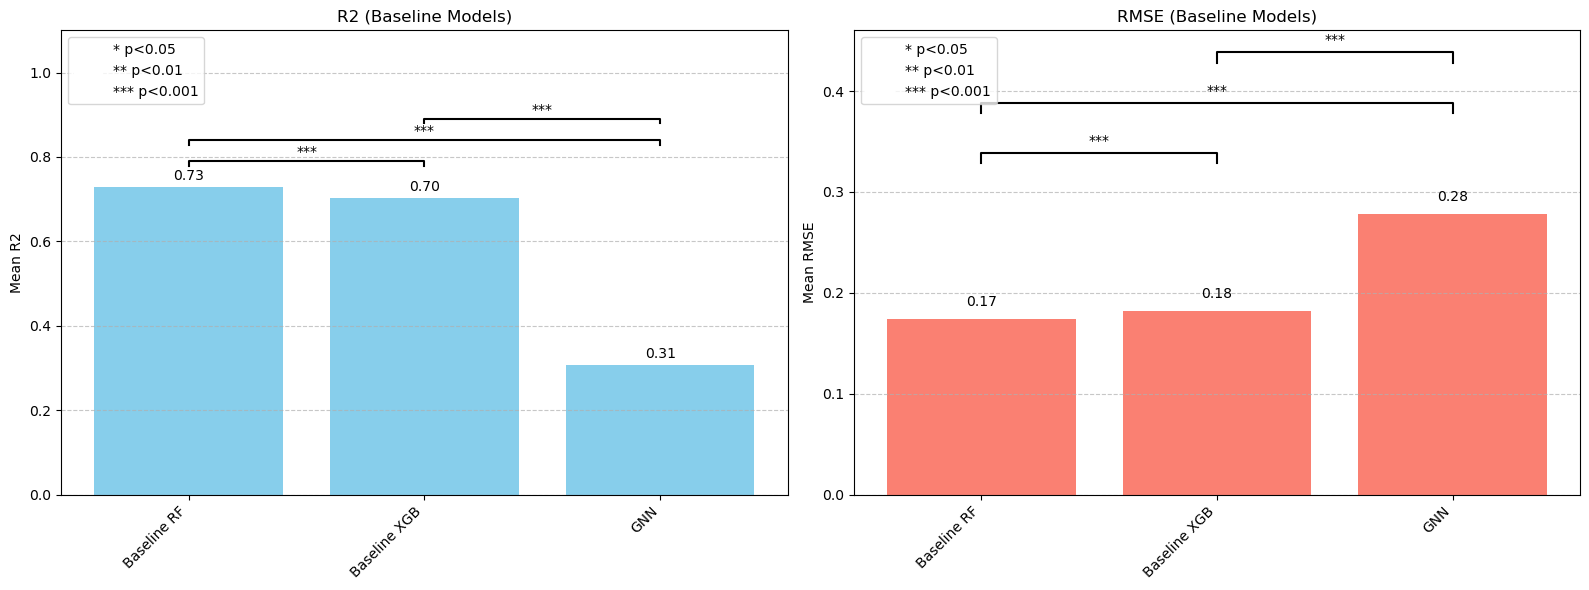

10-Fold CV Summary Table (Enhanced Features)

       Model            R2          RMSE
 Node2Vec RF 0.729 ± 0.002 0.174 ± 0.001
Node2Vec XGB 0.729 ± 0.002 0.174 ± 0.001
        GNN+ 0.587 ± 0.006 0.215 ± 0.002




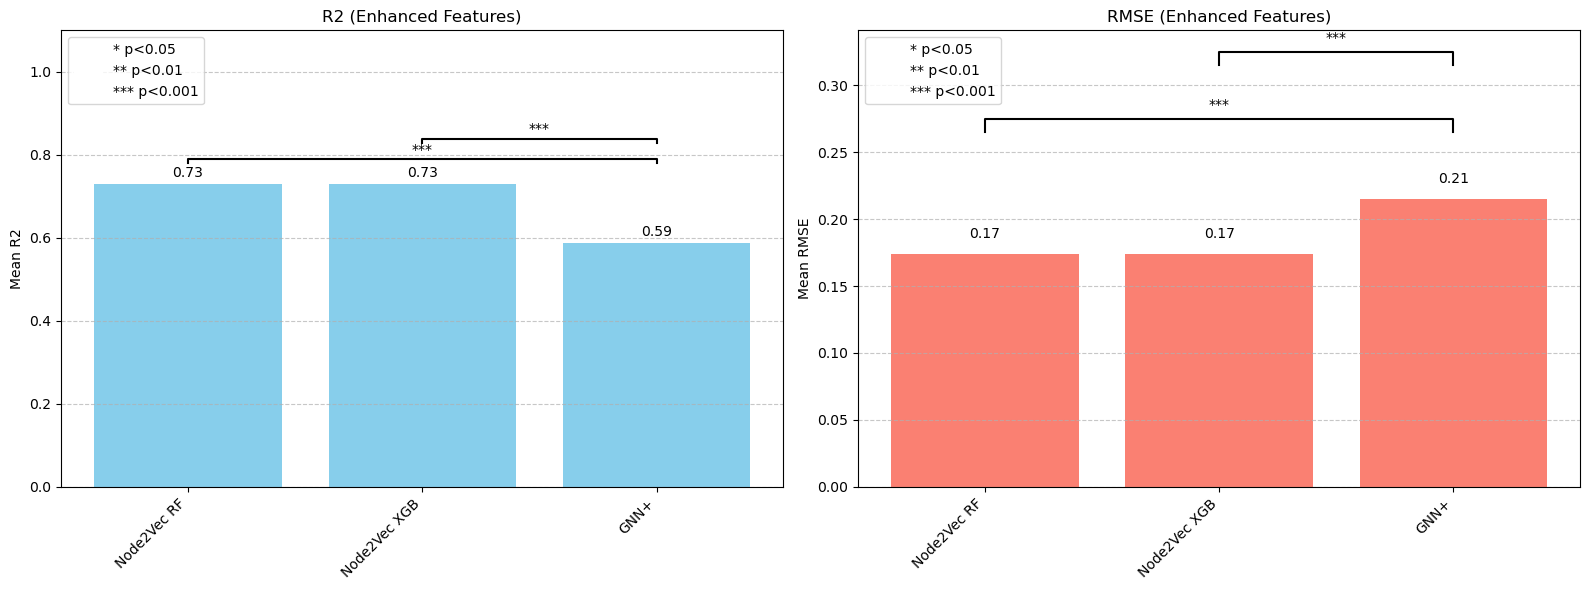

10-Fold CV Summary Table (All Models)

       Model            R2          RMSE
 Baseline RF 0.729 ± 0.002 0.174 ± 0.001
Baseline XGB 0.703 ± 0.003 0.182 ± 0.001
 Node2Vec RF 0.729 ± 0.002 0.174 ± 0.001
Node2Vec XGB 0.729 ± 0.002 0.174 ± 0.001
         GNN 0.306 ± 0.005 0.278 ± 0.001
        GNN+ 0.587 ± 0.006 0.215 ± 0.002




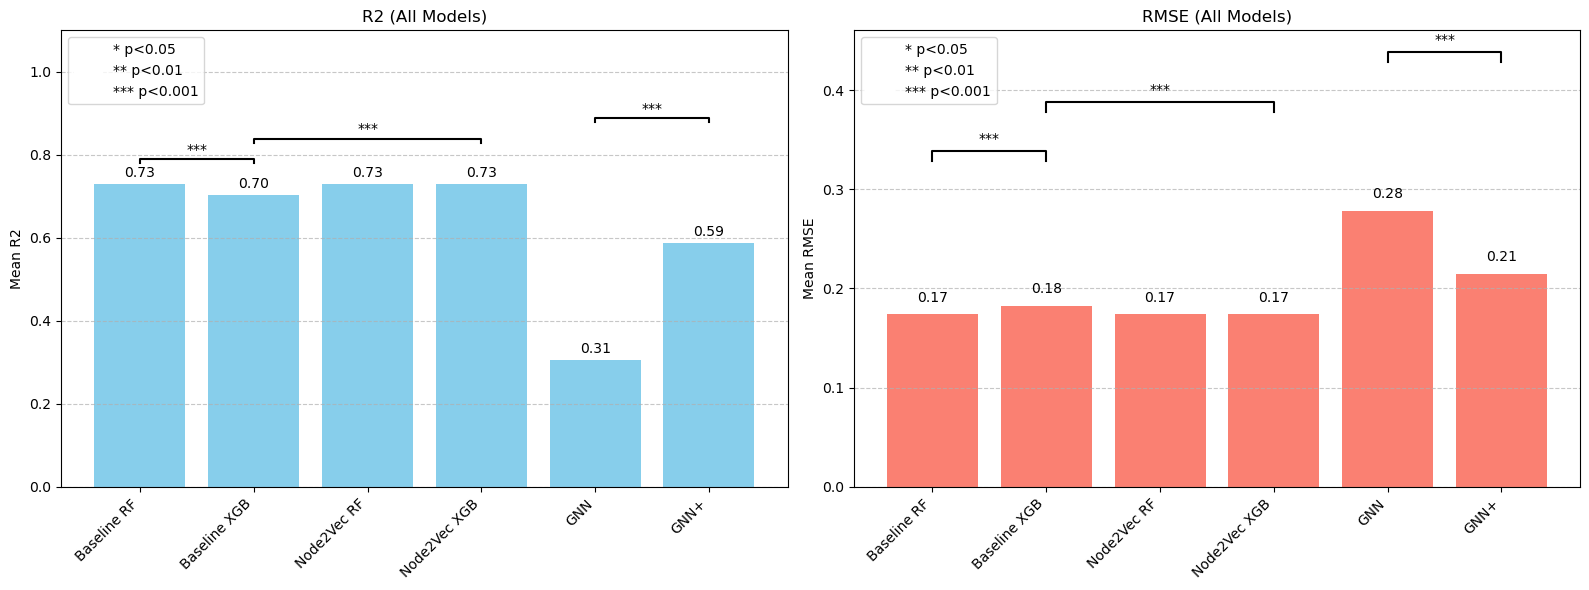

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import ttest_rel
from matplotlib.patches import Patch

# Load the results (assuming already loaded per your message)

# Function to turn p-value into stars
def pval_to_stars(p):
    if p <= 0.001:
        return '***'
    elif p <= 0.01:
        return '**'
    elif p <= 0.05:
        return '*'
    else:
        return ''

# Helper function to create subplots and print summary table
def plot_comparison(model_names, r2_means, r2_stds, rmse_means, rmse_stds, r2_scores, rmse_scores, comparisons, title_suffix=''):
    plt.figure(figsize=(16, 6))

    # Summary table
    summary_df = pd.DataFrame({
        'Model': model_names,
        'R2': [f"{mean:.3f} ± {std:.3f}" for mean, std in zip(r2_means, r2_stds)],
        'RMSE': [f"{mean:.3f} ± {std:.3f}" for mean, std in zip(rmse_means, rmse_stds)]
    })
    print(f"10-Fold CV Summary Table {title_suffix}")
    print()
    print(summary_df.to_string(index=False))
    print("\n")

    # R2 plot
    plt.subplot(1, 2, 1)
    bar_positions = np.arange(len(model_names))
    bars = plt.bar(bar_positions, r2_means, color='skyblue')
    plt.ylabel('Mean R2')
    plt.title(f'R2 {title_suffix}')
    plt.xticks(bar_positions, model_names, rotation=45, ha='right')
    plt.ylim(0, 1.1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    y_base = max(r2_means) + 0.05
    height_increment = 0.05
    current_height = y_base
    for (i1, i2) in comparisons:
        t_stat, p_val = ttest_rel(r2_scores[i1], r2_scores[i2])
        stars = pval_to_stars(p_val)
        if stars:
            plt.plot([i1, i1, i2, i2], [current_height, current_height+0.01, current_height+0.01, current_height], lw=1.5, c='k')
            plt.text((i1+i2)/2, current_height+0.015, stars, ha='center', va='bottom', color='k')
            current_height += height_increment

    for bar, value in zip(bars, r2_means):
        plt.text(bar.get_x() + bar.get_width()/2, value + 0.01, f"{value:.2f}", ha='center', va='bottom')

    handles = [
        Patch(color='white', label='* p<0.05'),
        Patch(color='white', label='** p<0.01'),
        Patch(color='white', label='*** p<0.001')
    ]
    plt.legend(handles=handles, loc='upper left', frameon=True, fontsize=10)

    # RMSE plot
    plt.subplot(1, 2, 2)
    bars = plt.bar(bar_positions, rmse_means, color='salmon')
    plt.ylabel('Mean RMSE')
    plt.title(f'RMSE {title_suffix}')
    plt.xticks(bar_positions, model_names, rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    y_base = max(rmse_means) + 0.05
    height_increment = 0.05
    current_height = y_base
    for (i1, i2) in comparisons:
        t_stat, p_val = ttest_rel(rmse_scores[i1], rmse_scores[i2])
        stars = pval_to_stars(p_val)
        if stars:
            plt.plot([i1, i1, i2, i2], [current_height, current_height+0.01, current_height+0.01, current_height], lw=1.5, c='k')
            plt.text((i1+i2)/2, current_height+0.015, stars, ha='center', va='bottom', color='k')
            current_height += height_increment

    for bar, value in zip(bars, rmse_means):
        plt.text(bar.get_x() + bar.get_width()/2, value + 0.01, f"{value:.2f}", ha='center', va='bottom')

    handles = [
        Patch(color='white', label='* p<0.05'),
        Patch(color='white', label='** p<0.01'),
        Patch(color='white', label='*** p<0.001')
    ]
    plt.legend(handles=handles, loc='upper left', frameon=True, fontsize=10)

    plt.tight_layout()
    plt.show()

# (The rest of the code remains unchanged.)


# Define model sets and scores
all_model_names = ['Baseline RF', 'Baseline XGB', 'Node2Vec RF', 'Node2Vec XGB', 'GNN', 'GNN+']
all_r2_means = [baseline_rf_r2.mean(), baseline_xgb_r2.mean(), n2v_rf_r2.mean(), n2v_xgb_r2.mean(), gnn_r2.mean(), gnn_feat_r2.mean()]
all_r2_stds = [baseline_rf_r2.std(), baseline_xgb_r2.std(), n2v_rf_r2.std(), n2v_xgb_r2.std(), gnn_r2.std(), gnn_feat_r2.std()]
all_rmse_means = [baseline_rf_rmse.mean(), baseline_xgb_rmse.mean(), n2v_rf_rmse.mean(), n2v_xgb_rmse.mean(), gnn_rmse.mean(), gnn_feat_rmse.mean()]
all_rmse_stds = [baseline_rf_rmse.std(), baseline_xgb_rmse.std(), n2v_rf_rmse.std(), n2v_xgb_rmse.std(), gnn_rmse.std(), gnn_feat_rmse.std()]
all_r2_scores = [baseline_rf_r2, baseline_xgb_r2, n2v_rf_r2, n2v_xgb_r2, gnn_r2, gnn_feat_r2]
all_rmse_scores = [baseline_rf_rmse, baseline_xgb_rmse, n2v_rf_rmse, n2v_xgb_rmse, gnn_rmse, gnn_feat_rmse]

# Plot for Baseline RF, Baseline XGB, and GNN
plot_comparison(
    ['Baseline RF', 'Baseline XGB', 'GNN'],
    [baseline_rf_r2.mean(), baseline_xgb_r2.mean(), gnn_r2.mean()],
    [baseline_rf_r2.std(), baseline_xgb_r2.std(), gnn_r2.std()],
    [baseline_rf_rmse.mean(), baseline_xgb_rmse.mean(), gnn_rmse.mean()],
    [baseline_rf_rmse.std(), baseline_xgb_rmse.std(), gnn_rmse.std()],
    [baseline_rf_r2, baseline_xgb_r2, gnn_r2],
    [baseline_rf_rmse, baseline_xgb_rmse, gnn_rmse],
    [(0,1),(0,2),(1,2)],
    title_suffix='(Baseline Models)'
)

# Plot for Node2Vec RF, Node2Vec XGB, and GNN+
plot_comparison(
    ['Node2Vec RF', 'Node2Vec XGB', 'GNN+'],
    [n2v_rf_r2.mean(), n2v_xgb_r2.mean(), gnn_feat_r2.mean()],
    [n2v_rf_r2.std(), n2v_xgb_r2.std(), gnn_feat_r2.std()],
    [n2v_rf_rmse.mean(), n2v_xgb_rmse.mean(), gnn_feat_rmse.mean()],
    [n2v_rf_rmse.std(), n2v_xgb_rmse.std(), gnn_feat_rmse.std()],
    [n2v_rf_r2, n2v_xgb_r2, gnn_feat_r2],
    [n2v_rf_rmse, n2v_xgb_rmse, gnn_feat_rmse],
    [(0,1),(0,2),(1,2)],
    title_suffix='(Enhanced Features)'
)

# Plot for all models
plot_comparison(
    all_model_names,
    all_r2_means,
    all_r2_stds,
    all_rmse_means,
    all_rmse_stds,
    all_r2_scores,
    all_rmse_scores,
    [(0,1), (0,2), (1,3), (2,3), (4,5)],
    title_suffix='(All Models)'
)